In [1441]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from fuzzywuzzy import fuzz #conda install -c conda-forge fuzzywuzzy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #conda install -c conda-forge wordcloud
import plotly.graph_objects as go #conda install -c plotly plotly=4.7.1
from textblob import TextBlob #conda install -c conda-forge textblob



sns.set_palette("Set2")
tweets = pd.read_csv('data/train.csv').sort_values(by=['target'])
tweets

id       keyword                 location  \
3806   5408  fire%20truck                      NaN   
3444   4922      exploded                      USA   
3443   4920      exploded         Elmwood Park, NJ   
6219   8875         smoke  3.28.15|7.20.15|7.25.15   
3440   4917      exploded                      NaN   
...     ...           ...                      ...   
3663   5213      fatality                      NaN   
3660   5210    fatalities                  Ireland   
3659   5209    fatalities               Lima, Ohio   
3673   5228      fatality           Fort Wayne, IN   
7612  10873           NaN                      NaN   

                                                   text  target  
3806  Former Township fire truck being used in Phili...       0  
3444  The Dress Memes Have Officially Exploded On Th...       0  
3443  Well as I was chaning an iPad screen it fuckin...       0  
6219  So does Austin smoke too since he agreed to th...       0  
3440  Im Dead!!! My two Loves in 1 photo! My Heart e...       0  
...                                                 ...     ...  
3663                             @Truly_Stings Yo Dm me       1  
3660  Driver fatalities down on Irish roads but pede...       1  
3659  Message boards will display updated traffic fa...       1  
3673  Kosciusko police investigating pedestrian fata...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

In [1442]:
tweets_text = tweets.loc[:,['text','target']]
tweets_text['target_boolean'] = tweets_text['target']
tweets_text['target'] = tweets_text['target'].transform(lambda x: 'Real' if x == 1 else 'Falso')
tweets_text

text target  target_boolean
3806  Former Township fire truck being used in Phili...  Falso               0
3444  The Dress Memes Have Officially Exploded On Th...  Falso               0
3443  Well as I was chaning an iPad screen it fuckin...  Falso               0
6219  So does Austin smoke too since he agreed to th...  Falso               0
3440  Im Dead!!! My two Loves in 1 photo! My Heart e...  Falso               0
...                                                 ...    ...             ...
3663                             @Truly_Stings Yo Dm me   Real               1
3660  Driver fatalities down on Irish roads but pede...   Real               1
3659  Message boards will display updated traffic fa...   Real               1
3673  Kosciusko police investigating pedestrian fata...   Real               1
7612  The Latest: More Homes Razed by Northern Calif...   Real               1

[7613 rows x 3 columns]

# Cuál es la distribución entre tweets Reales y Falsos? 

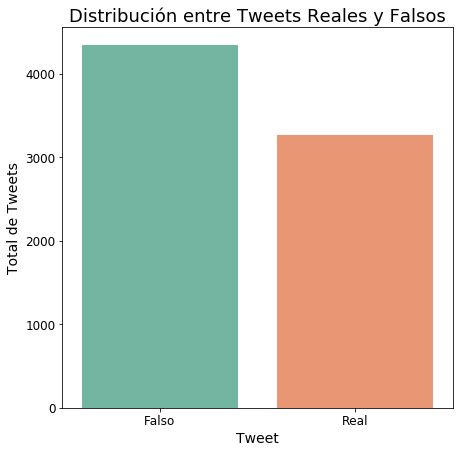

In [1443]:
rcParams['figure.figsize'] = 7,7
ax = sns.barplot(data = tweets_text.target.value_counts().reset_index(),x='index',y='target')
ax.set_title("Distribución entre Tweets Reales y Falsos",fontsize= 18)
ax.set_ylabel("Total de Tweets",fontsize= 14)
ax.set_xlabel("Tweet",fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# Relación cantidad de palabras del tweet y veracidad

Se indica para cada tweet cuantas palabras posee el texto

In [1444]:
tweets_text['total_words'] = tweets_text.text.transform(lambda x: len(x.split(" ")))


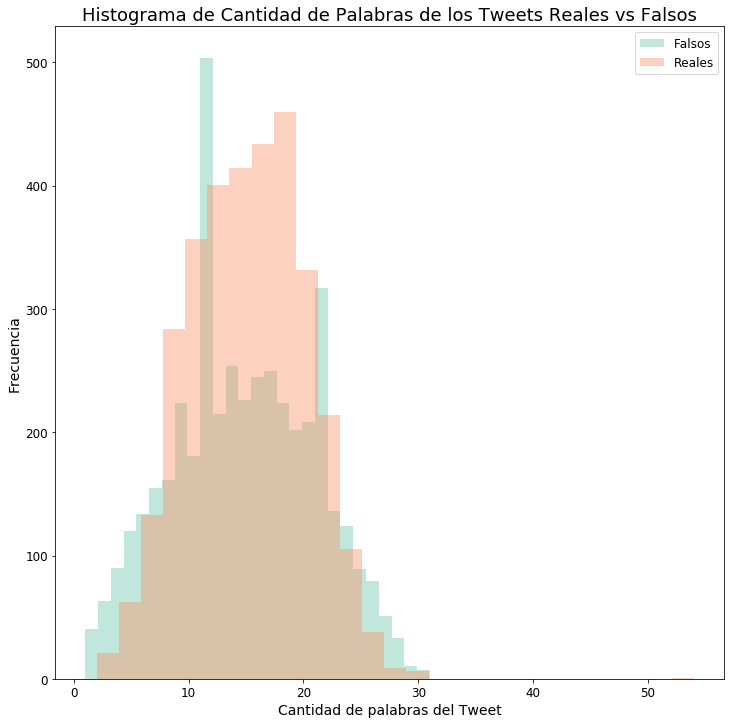

In [1445]:
rcParams['figure.figsize'] = 12,12
total_bins = tweets_text.total_words.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_words'],  kde=False, label='Falsos',bins = total_bins)
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_words'],  kde=False, label='Reales', bins = total_bins)
plt.legend(prop={'size': 12})
plt.title("Histograma de Cantidad de Palabras de los Tweets Reales vs Falsos",fontsize= 18)
plt.xlabel("Cantidad de palabras del Tweet",fontsize= 14)
plt.ylabel('Frecuencia',fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# Relación entre la cantidad de caracteres y  veracidad del tweet

In [1446]:
tweets_text['len_text'] = tweets_text.text.transform(lambda x: len(x))


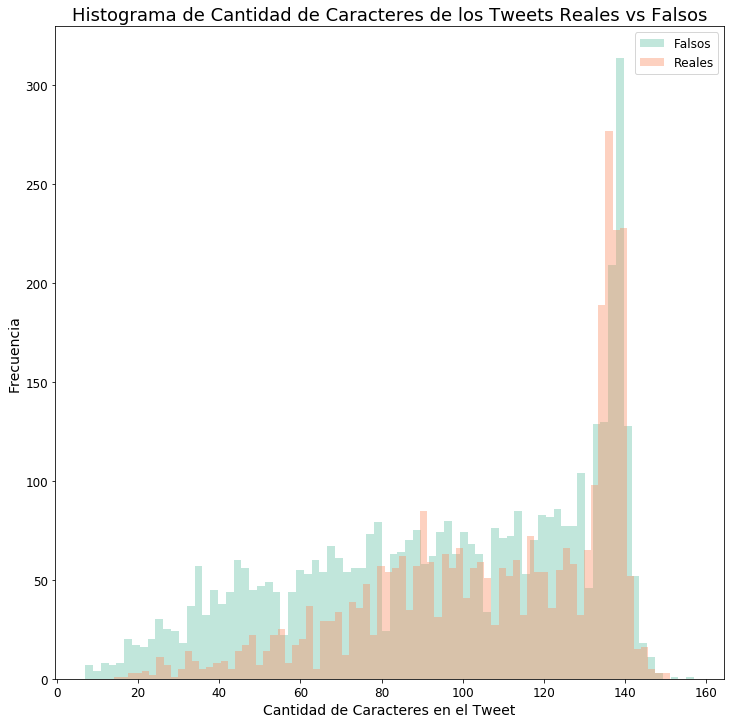

In [1447]:
total_bins = tweets_text.len_text.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','len_text'],  kde=False, label='Falsos',bins = total_bins)
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','len_text'],  kde=False, label='Reales', bins = total_bins)
plt.legend(prop={'size': 12})
plt.title("Histograma de Cantidad de Caracteres de los Tweets Reales vs Falsos",fontsize= 18)
plt.xlabel("Cantidad de Caracteres en el Tweet",fontsize= 14)
plt.ylabel('Frecuencia',fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# ¿Existe diferencias entre las distribuciones de los tweets según su cantidad de palabras y longitud del texto?

In [1448]:
tweets_text['len_text_normal'] = (tweets_text.len_text-tweets_text.len_text.mean()) /np.std(tweets_text.len_text)
tweets_text['total_words_normal'] = (tweets_text.total_words-tweets_text.total_words.mean()) /np.std(tweets_text.total_words)


Text(0.5, 0, 'Longitud de texto o catidad de palabras normalizado')

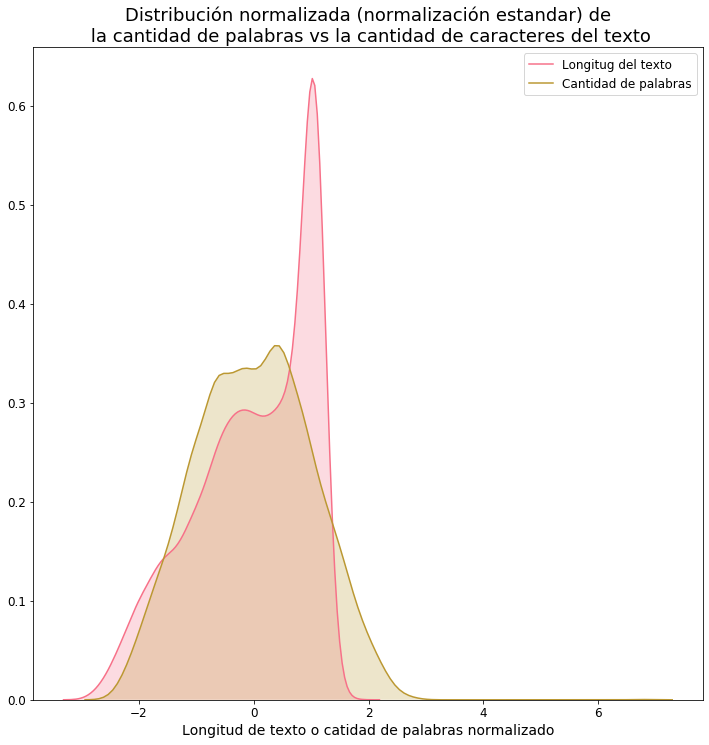

In [1449]:
sns.set_palette("husl")
sns.kdeplot(tweets_text.len_text_normal, label='Longitug del texto',shade=True)
sns.kdeplot(tweets_text.total_words_normal, label='Cantidad de palabras',shade=True)
plt.legend(prop={'size': 12})
plt.title("Distribución normalizada (normalización estandar) de\n la cantidad de palabras vs la cantidad de caracteres del texto",fontsize=18)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)
plt.xlabel("Longitud de texto o catidad de palabras normalizado",fontsize= 14)




# Cuál es la correlación entre la cantidad de palabras del tweet y su longitud separados por target?

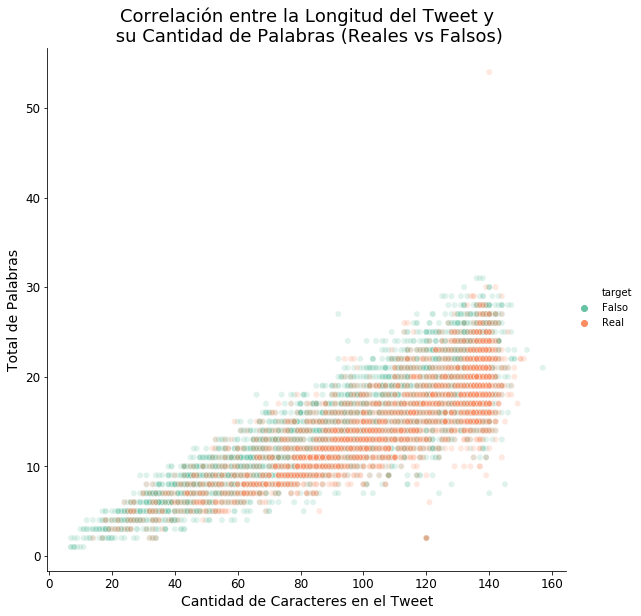

In [1450]:
sns.set_palette("Set2")
scater = sns.relplot(y="total_words", x="len_text", hue="target", alpha=.2,height=8, data=tweets_text)
plt.title("Correlación entre la Longitud del Tweet y\n su Cantidad de Palabras (Reales vs Falsos)",fontsize= 18)
plt.xlabel("Cantidad de Caracteres en el Tweet",fontsize= 14)
plt.ylabel('Total de Palabras',fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# Relación entre la cantidad de caracteres de un tipo específico (mayusculas,numéricos y especiales) y la veracidad del tweet

In [1451]:
#Recibe un string y devuelve la cantidad de caracteres en mayusculas que posee
def get_upper_total(s):
    total = 0
    for x in s:
        y = ord(x)
        if y > 90:
            continue
        if y > 64:
            total = total + 1
    return total

#Recibe un string y devuelve la cantidad de caracteres numéricos que posee
def get_total_numbers_chars(s):
    total = 0
    for x in s:
        y = ord(x)
        if y in range(48,58):
            total = total + 1
    return total
#Recibe un string y devuelve la cantidad de caracteres especiales que posee (excluye una lista de caracteres comunes)
def get_special_chars_total(s):
    total = 0
    common_esp_chr = [" ",".","?",",","!"]
    for x in s:
        y = ord(x)
        if y in range(97,123) or y in range(65,91) or y in range(48,58) or x in common_esp_chr:
            continue
        total = total + 1
    return total

Se obtiene para cada tweet la cantidad de caracteres en mayusculas que posee el texto

In [1452]:
tweets_text['total_upper_chars'] = tweets_text.text.transform(lambda x: get_upper_total(x))

Se obtiene para cada tweet la cantidad de caracteres numéricos que posee el texto

In [1453]:
tweets_text['total_numbers_chars'] = tweets_text.text.transform(lambda x: get_total_numbers_chars(x))

Se obtiene para cada tweet la cantidad de caracteres especiales que posee el texto (sin incluir los mas comunes)

In [1454]:
tweets_text['total_special_chars'] = tweets_text.text.transform(lambda x: get_special_chars_total(x))

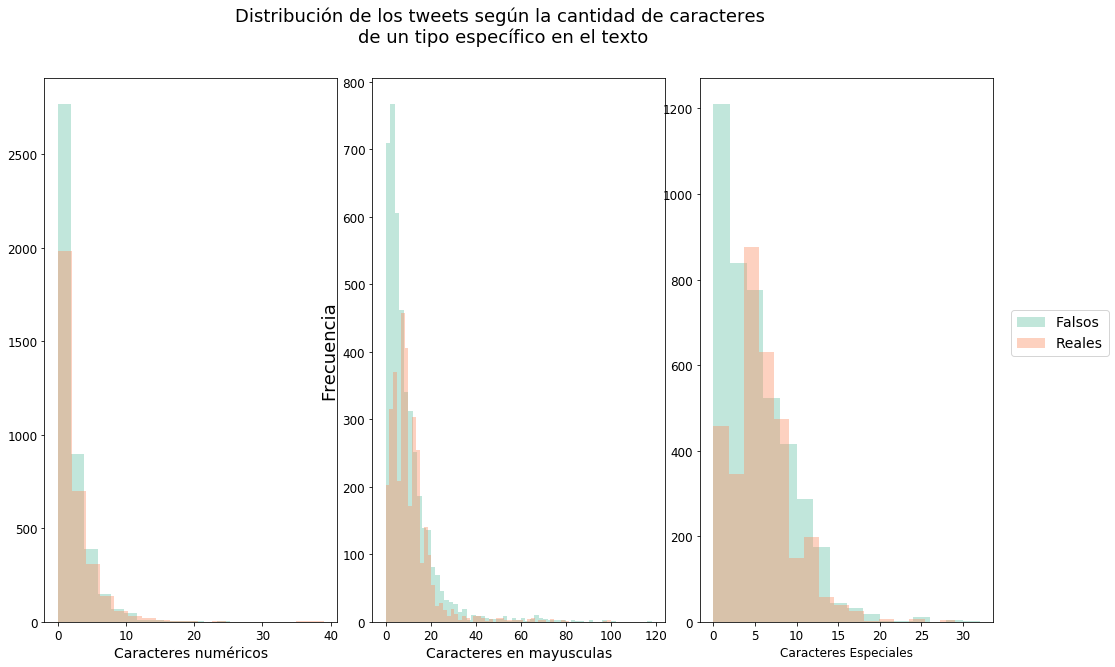

In [1455]:

f, ax = plt.subplots(1, 3, figsize=(17,10),gridspec_kw={'wspace': 0.12})

total_bins = tweets_text.total_upper_chars.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_upper_chars'],  kde=False, label='Falsos',bins = total_bins,ax=ax[1])
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_upper_chars'],  kde=False, label='Reales', bins = total_bins,ax=ax[1])
ax[1].set_xlabel("Caracteres en mayusculas", fontsize=14)
ax[1].set_ylabel('Frecuencia', fontsize=18)



total_bins = tweets_text.total_numbers_chars.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_numbers_chars'],  kde=False, label='Falsos',bins = total_bins,ax=ax[0])
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_numbers_chars'],  kde=False, label='Reales', bins = total_bins,ax=ax[0])
ax[0].set_xlabel("Caracteres numéricos", fontsize=14)



total_bins = tweets_text.total_special_chars.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_special_chars'],  kde=False, label='Falsos',bins = total_bins,ax=ax[2])
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_special_chars'],  kde=False, label='Reales', bins = total_bins,ax=ax[2])
ax[2].set_xlabel("Caracteres Especiales", fontsize=12)

f.suptitle('Distribución de los tweets según la cantidad de caracteres \nde un tipo específico en el texto', fontsize=18)
f.legend(["Falsos","Reales"],prop={'size': 14},loc=5)
ax[0].tick_params(axis="y", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)
ax[2].tick_params(axis="y", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="x", labelsize=12)
ax[2].tick_params(axis="x", labelsize=12)


# ¿Incluyen los tweets elementos especiales como preguntas o enlaces ? como se distribuyen con relación al target

Indicamos para cada tweet si posee o no una pregunta (se asume que la posee si contiene el caracter "?")

In [1456]:
tweets_text['contain_question'] = tweets_text.text.transform(lambda x: "?" in x)

Indicamos para cada tweet si posee o no un enlace (se asume que la posee si contiene "http")

In [1457]:
tweets_text['contain_link'] = tweets_text.text.transform(lambda x: "http" in x)

Text(0.5, 0.98, 'Bar Plot del target de los tweets que contienen enlaces y preguntas')

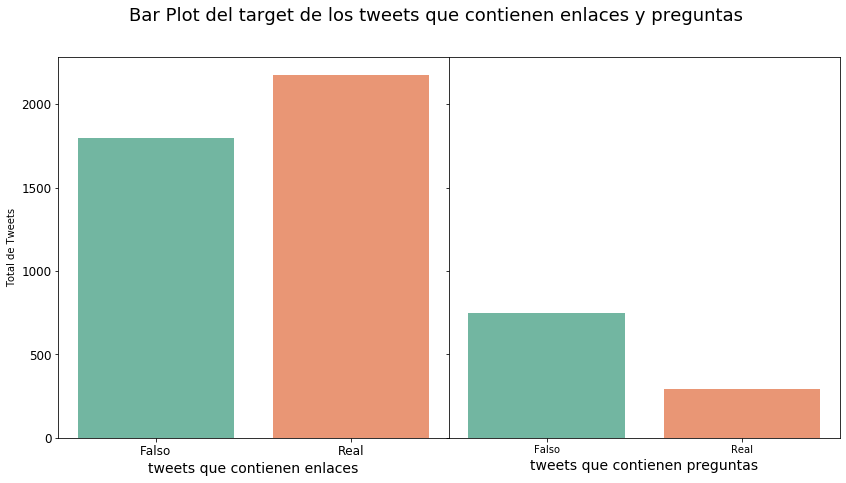

In [1458]:
f, ax = plt.subplots(1, 2, figsize=(14,7),gridspec_kw={'wspace': 0})

sns.barplot(data = tweets_text.loc[tweets_text.contain_link == True].target.value_counts().reset_index().sort_values(by=['target']),x='index',y='target',ax=ax[0])
ax[0].set_ylabel("Total de Tweets")
ax[0].set_xlabel("tweets que contienen enlaces",fontsize=14)

sns.barplot(data = tweets_text.loc[tweets_text.contain_question == True].target.value_counts().reset_index(),x='index',y='target',ax=ax[1])
ax[1].set_xlabel("tweets que contienen preguntas",fontsize=14)

ax[0].label_outer()
ax[1].label_outer()
ax[1].set_ylim(ax[0].get_ylim())

ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="y", labelsize=12)


f.suptitle('Bar Plot del target de los tweets que contienen enlaces y preguntas', fontsize=18)


# Analisis del "sentimiento" del texto

La biblioteca de textblob posee una función que analiza el "sentimiento" de un texto, generando dos métricas llamadas polaridad y subjetividad. La primera es un float entre -1 y 1, para la cual mientras mas cerca del 1 este entonces es un sentimiento positivo (es más negativo mientras más se acerca al -1 y es más neutro cuanto más se acerque al 0). La segunda es un float entre 0 y 1, el sentimiento será más subjetivo cuanto mayor sea el valor.   

In [1459]:
def subjectivityText(x):
  t=TextBlob(x)
  return t.sentiment.subjectivity
def polarityText(x):
  t=TextBlob(x)
  return t.sentiment.polarity

Se generan las columnas con su respectiva polaridad y subjetividad de cada texto

In [1460]:
tweets_text["subjectivity_text"]=tweets_text.text.transform(subjectivityText)
tweets_text["polarity_text"]=tweets_text.text.transform(polarityText)


# ¿Cómo se distribuye la polaridad y la subjetividad de los textos diferenciados por target?

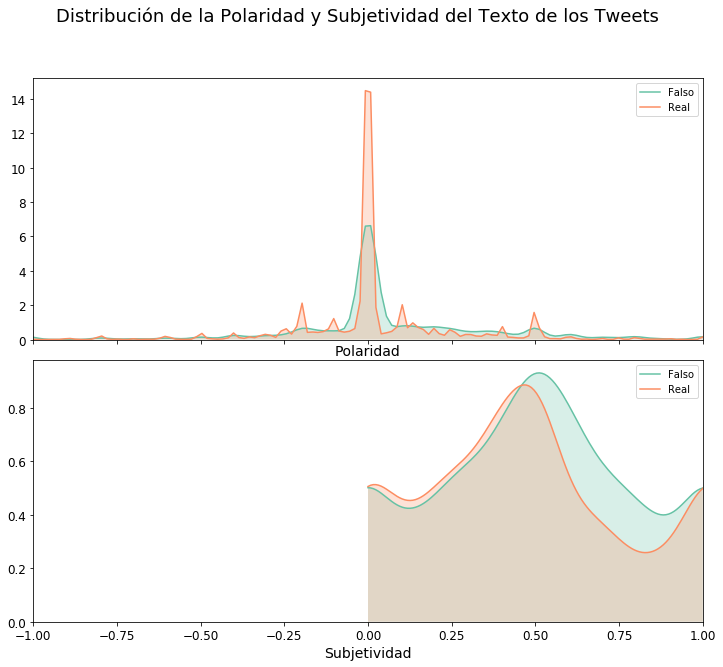

In [1461]:
f, ax = plt.subplots(2, 1, figsize=(12,10),gridspec_kw={'hspace': 0.08})
sns.kdeplot(tweets_text.loc[tweets_text.target == 'Falso'].polarity_text, label='Falso',shade=True,ax=ax[0],cut=0)
sns.kdeplot(tweets_text.loc[tweets_text.target == 'Real'].polarity_text, label='Real',shade=True,ax=ax[0],cut=0)

sns.kdeplot(tweets_text.loc[tweets_text.target == 'Falso'].subjectivity_text, label='Falso',shade=True,ax=ax[1],cut=0)
sns.kdeplot(tweets_text.loc[tweets_text.target == 'Real'].subjectivity_text, label='Real',shade=True,ax=ax[1],cut=0)

f.suptitle('Distribución de la Polaridad y Subjetividad del Texto de los Tweets', fontsize=18)
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].label_outer()

ax[0].set_xlabel("Polaridad",fontsize=14)
ax[1].set_xlabel("Subjetividad",fontsize=14)

ax[0].tick_params(axis="y", labelsize=12)
ax[1].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)



#  ¿Se puede establecer un conjunto de palabras que dado un tweet que contenga al menos una, indique si es real o falso?


Para esto se hará un analsis de cada palabra en base a su frecuencia y longitud, el cual consistirá en buscar las palabras y su grado de veracidad (sobre aquellos tweets que contienen la palabra: porcentaje que son reales) 

Se crea un DataFrame con todas las palabras y sus frecuencias 

In [1462]:
words = []
for x in tweets_text.text.tolist():
    for y in x.split(" "):
        words.append(y.lower())
df_words = pd.Series(words).value_counts().to_frame().reset_index()
df_words.columns = ['word','frecuency']

In [1463]:
# Recibe las listas l1=[a1,a2,...,an] y l2=[b1,b2,...,bm] y las extiendea ambas a n x m elementos con la forma:
#  l1=[a1,...,a1,a2,...,a2,...,an,...,an] (m veces para cada elemento)
#  l2=[b1,b2,...,bm,b1,b2,...,bm] (n veces para cada m elementos)
#  Además devuelve una tercera lista con el producto cartesiano de las dos listas anteriores
def separate_cartesian_product_list(lenght_list, frecuency_list):
    first_list = lenght_list.copy()
    second_list = frecuency_list.copy()
    for x in range(len(second_list)-1):
        lenght_list.extend(first_list)
    lenght_list.sort()  
    for x in range(len(first_list)-1):
        frecuency_list.extend(second_list)
    
    third_list = []
    for x in first_list:
        for y in second_list:
            third_list.append((x,y))
    return third_list

In [1464]:
#Se crean dos listas, la primera contiene todas las longitudes mínimas y la segunda contiene las frecuencias mínimas
#que se imponen para pertenecer al conjuto de palabras más frecuentes. 
#Se crea un dataframe donde cada registro determina un conjunto de palabras, ya que este contiene las variables antes 
#mencionadas y además una dupla con los mismos valores
word_lenght = list(range(1,10))
word_frecuency = list(range(10,140,5))

len_vs_fre = separate_cartesian_product_list(word_lenght,word_frecuency)
tweets_frec_len = pd.DataFrame({'lenght_min':word_lenght,'frecuency_min':word_frecuency, 'len_and_fre':len_vs_fre}) 


In [1465]:
#Recibe un string y una colección de palabras, devuelve True en caso que al menos una de las palabras del string
#este contenida en la colección, Devuelve Falso para el caso contrario. 
def contain_long_words(s,long_words):
    for x in s.lower().split(" "):
        if x in long_words:
            return True
    return False

In [1466]:
#Recibe una dupla de elementos: (longitud min,frecuencia min). devuelve el porcentaje de tweets reales de aquellos
#que continen al menos una palabra del conjunto de palabras mas frecuentes determinados por longitud min y frecuencia min
def get_true_percentage(x):
    long_words = df_words.loc[df_words['word'].transform(lambda y: len(y) >=  x[0])].loc[df_words.frecuency >= x[1],'word'].tolist()
    tweets_text['contain_long_word'] = tweets_text['text'].transform(lambda y: contain_long_words(y,long_words))
    tweets_contain_long_words = tweets_text.loc[tweets_text.contain_long_word == True,:]
    total_true =tweets_contain_long_words.loc[tweets_text.target == 'Real','target'].count()
    total_False = tweets_contain_long_words.loc[tweets_text.target == 'Falso','target'].count()

    return total_true*100/(total_true +total_False)

El siguiente dataframe indica los porcentajes de tweets reales de aquellos que por lo menos una de sus palabras se encuentran en las palabras más frecuentes de logintud min y frecuencia min especificados

In [1467]:
tweets_frec_len['true_percentage'] = tweets_frec_len['len_and_fre'].transform(lambda x: get_true_percentage(x)) 
data_for_heatmap =tweets_frec_len.drop(columns=['len_and_fre']).set_index(['frecuency_min','lenght_min']).unstack()
data_for_heatmap.columns = list(range(1,10))



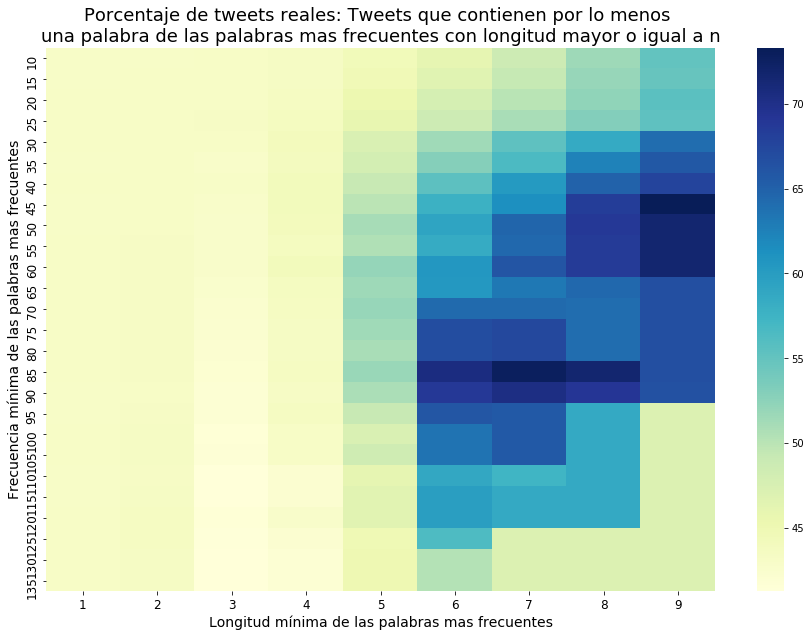

In [1468]:
rcParams['figure.figsize'] = 15,10
heatmap = sns.heatmap(data_for_heatmap,cmap="YlGnBu")
heatmap.set_title("Porcentaje de tweets reales: Tweets que contienen por lo menos \nuna palabra de las palabras mas frecuentes con longitud mayor o igual a n",fontsize= 18)
heatmap.set_xlabel("Longitud mínima de las palabras mas frecuentes",fontsize= 14)
heatmap.set_ylabel("Frecuencia mínima de las palabras mas frecuentes",fontsize= 14)
heatmap.tick_params(axis="y", labelsize=12)
heatmap.tick_params(axis="x", labelsize=12)


In [1469]:
def get_true_pertentage_word(x):
    x_list = []
    x_list.append(x)
    tweets_text['contain_long_word'] = tweets_text['text'].transform(lambda y: contain_long_words(y,x_list))
    tweets_contain_long_words = tweets_text.loc[tweets_text.contain_long_word == True,:]
    total_true =tweets_contain_long_words.loc[tweets_text.target == 'Real','target'].count()
    total_False = tweets_contain_long_words.loc[tweets_text.target == 'Falso','target'].count()
    if (total_true +total_False) == False:
        print(x)
        print(tweets_contain_long_words)
    return total_true*100/(total_true +total_False),total_true

In [1470]:
words_set = pd.DataFrame(df_words.loc[df_words['word'].transform(lambda y: len(y) >=  5)].loc[df_words.frecuency >= 30,'word'].tolist())
words_set['percentage_true'] = words_set[0].transform(lambda x: get_true_pertentage_word(x))
words_set['total_tweets_true'] = words_set['percentage_true'].transform(lambda x: x[1]).astype('int')
words_set['percentage_true'] = words_set['percentage_true'].transform(lambda x: x[0]).astype('int')


Se toman las palabras tienen más de un 75% de veracidad y que haya más de 30 de estos (este sería el conjunto de palabras buscados)

In [1471]:
best_words = words_set.loc[words_set.percentage_true > 75].loc[words_set.total_tweets_true >30][0].tolist()


Se indica a cada tweet si contiene o no al menos una palabra de esta "bolsa de palabras"

In [1472]:
tweets_text['contain_long_word'] = tweets_text['text'].transform(lambda y: contain_long_words(y,best_words))

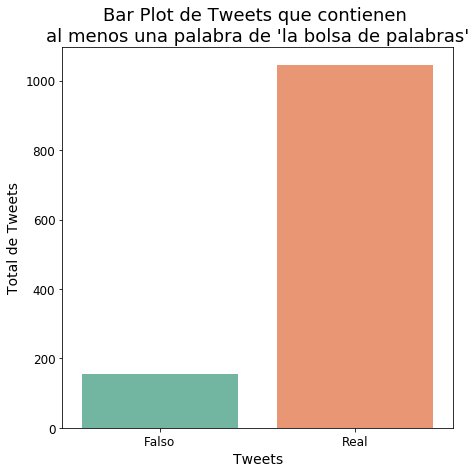

In [1473]:
rcParams['figure.figsize'] = 7,7
ax = sns.barplot(data = tweets_text.loc[tweets_text['contain_long_word'] == True].target.value_counts().reset_index().sort_values(by=['target']),x='index',y='target')
ax.set_title("Bar Plot de Tweets que contienen \nal menos una palabra de 'la bolsa de palabras'",fontsize= 18)
ax.set_ylabel("Total de Tweets",fontsize= 14)
ax.set_xlabel("Tweets",fontsize= 14)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="x", labelsize=12)


# ¿Cuales son los Keywords de tweets reales con mayor frecuencia ?

In [1474]:
tweets_text_key = tweets.loc[:,['text','keyword','target']].dropna()

Agrupación de keyword por similitud

In [1475]:
#Recibe una lista de keywords y regresa un diccionario cuyas claves son los elementos de la lista pasada y los valores
#son las keywords agrupadas que las representa
def get_keyword_dic(key_list):
    key_dic = {}
    unique_list = []
    for x in key_list:
        z = x
        if "%20" in x:
            z = " ".join(x.split("%20"))
        similarity = 0
        value = ""
        for y in unique_list:
            ratio = fuzz.ratio(z,y)
            if ratio > similarity:
                similarity = ratio
                value = y
        if similarity > 75:
            key_dic[x] = value
        else:
            key_dic[x] = z
            unique_list.append(z)
    return key_dic
key_grouped = get_keyword_dic(tweets_text_key.keyword.tolist())

Agrupoamiento manual

In [1476]:
key_grouped['blazing'] = 'ablaze'
key_grouped['bleeding'] = 'blood'
key_grouped['buildings%20on%20fire'] = 'buildings burning'
key_grouped['burning%20buildings'] = 'buildings burning'
key_grouped['burning'] = 'burned'
key_grouped['dead'] = 'death'
key_grouped['demolition'] = 'demolish'
key_grouped['destruction'] = 'destroy'
key_grouped['explosion'] = 'explode'
key_grouped['flood'] = 'flooding'
key_grouped['floods'] = 'flooding'
key_grouped['inundated'] = 'inundation'
key_grouped['panic'] = 'panicking'
key_grouped['rainstorm'] = 'rainstorm'
key_grouped['riot'] = 'rioting'
key_grouped['screaming'] = 'screamed'
key_grouped['snowstorm'] = 'snowstorm'
key_grouped['survivors'] = 'survive'
key_grouped['traumatised'] = 'trauma'
key_grouped['violent%20storm'] = 'storm'
key_grouped['windstorm'] = 'storm'
key_grouped['traumatised'] = 'trauma'

tweets_text_key['keyword_grouped'] = tweets_text_key.keyword.transform(lambda x: key_grouped[x])


 Visualización wordcloud de las keywords categóricas

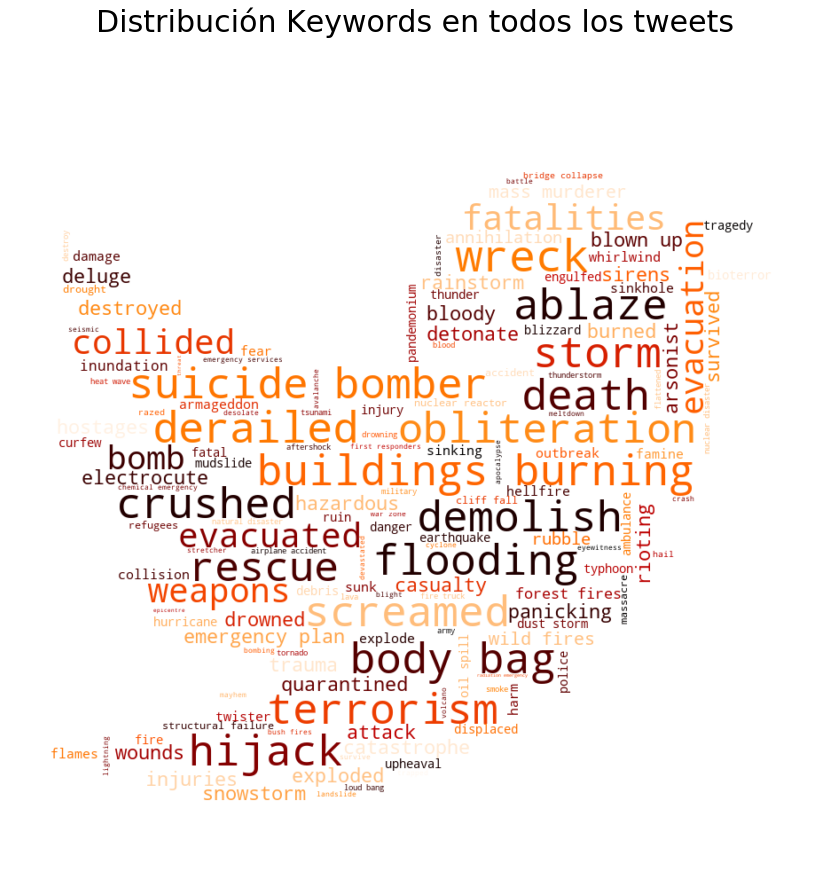

In [1477]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

keywords_count = tweets_text_key.keyword_grouped.value_counts()
keywords_count.index = keywords_count.index.map(str)

mask = np.array(Image.open("./img/twitter_black.png"))
mask_transformed = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    mask_transformed[i] = list(map(transform_format, mask[i]))

wordcloud = WordCloud(max_font_size=50, max_words=200, random_state=42, 
                      background_color='white', colormap='gist_heat',
                      mask=mask_transformed)
wordcloud.generate_from_frequencies(keywords_count)

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribución Keywords en todos los tweets", fontsize=30, pad=40)
plt.axis("off")
plt.show()

Porcentaje de verdaderos y falsos por cada keyword¶


In [1478]:
keywords_grouped = tweets_text_key.groupby(['keyword_grouped', 'target']).agg({'keyword_grouped':['count']})
keywords_level1 = keywords_grouped.columns.get_level_values(1)
keywords_grouped.columns = keywords_level1
keywords_grouped.reset_index(inplace=True)
keywords_grouped.head(10)

keyword_grouped  target  count
0             ablaze       0     89
1             ablaze       1     19
2           accident       0     11
3           accident       1     24
4         aftershock       0     34
5  airplane accident       0      5
6  airplane accident       1     30
7          ambulance       0     18
8          ambulance       1     20
9       annihilation       0     42

In [1479]:
keywords_total_count = tweets_text_key.groupby(['keyword_grouped']).agg({'keyword_grouped': ['count']})
keywords_total_count.columns = 'total_' + keywords_total_count.columns.get_level_values(1)
keywords_total_count.reset_index(inplace=True)
keywords_total_count.head(10)

keyword_grouped  total_count
0             ablaze          108
1           accident           35
2         aftershock           34
3  airplane accident           35
4          ambulance           38
5       annihilation           63
6         apocalypse           32
7         armageddon           42
8               army           34
9           arsonist           66

In [1480]:
keywords = keywords_grouped.merge(keywords_total_count, left_on='keyword_grouped', right_on='keyword_grouped', how='left')
keywords.loc[:,'percentage_count'] = (keywords.loc[:, 'count'] / keywords.loc[:, 'total_count']) * 100
keywords.head(10)

keyword_grouped  target  count  total_count  percentage_count
0             ablaze       0     89          108         82.407407
1             ablaze       1     19          108         17.592593
2           accident       0     11           35         31.428571
3           accident       1     24           35         68.571429
4         aftershock       0     34           34        100.000000
5  airplane accident       0      5           35         14.285714
6  airplane accident       1     30           35         85.714286
7          ambulance       0     18           38         47.368421
8          ambulance       1     20           38         52.631579
9       annihilation       0     42           63         66.666667

# Keywords tweets más acertados, tomando como > 90% targeted y frecuencia mayor a 10 (Verdadero)


In [1481]:
targeted_keywords = keywords.loc[(keywords['percentage_count'] > 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 1)]
targeted_keywords

keyword_grouped  target  count  total_count  percentage_count
42            bombing       1     27           29         93.103448
79             debris       1     37           37        100.000000
199  nuclear disaster       1     31           34         91.176471
205         oil spill       1     37           38         97.368421
207          outbreak       1     39           40         97.500000
253    suicide bomber       1     94           99         94.949495
281           typhoon       1     37           38         97.368421

Text(0, 0.5, 'Keyword')

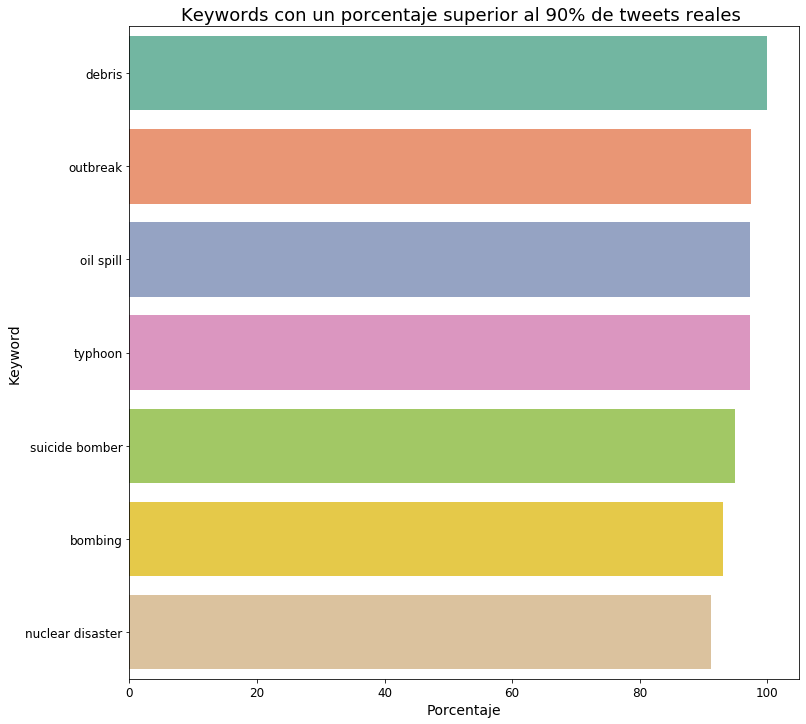

In [1482]:
targeted_keywords = targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=targeted_keywords['percentage_count'], y=targeted_keywords['keyword_grouped'],
               orient='h')

g.set_title('Keywords con un porcentaje superior al 90% de tweets reales ', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Keyword', fontsize=14)

# Keywords de tweets menos acertados, tomando como > 90% not targeted y frecuencia mayor a 10 (Falsos)


In [1483]:
not_targeted_keywords = keywords.loc[(keywords['percentage_count'] > 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 0)]
not_targeted_keywords

keyword_grouped  target  count  total_count  percentage_count
4        aftershock       0     34           34        100.000000
27           blight       0     30           32         93.750000
37         body bag       0    100          107         93.457944
120       epicentre       0     11           12         91.666667
156            harm       0     37           41         90.243902
210       panicking       0     65           70         92.857143
230            ruin       0     36           37         97.297297
242           smoke       0     31           34         91.176471
248       stretcher       0     30           33         90.909091

Text(0, 0.5, 'Keyword')

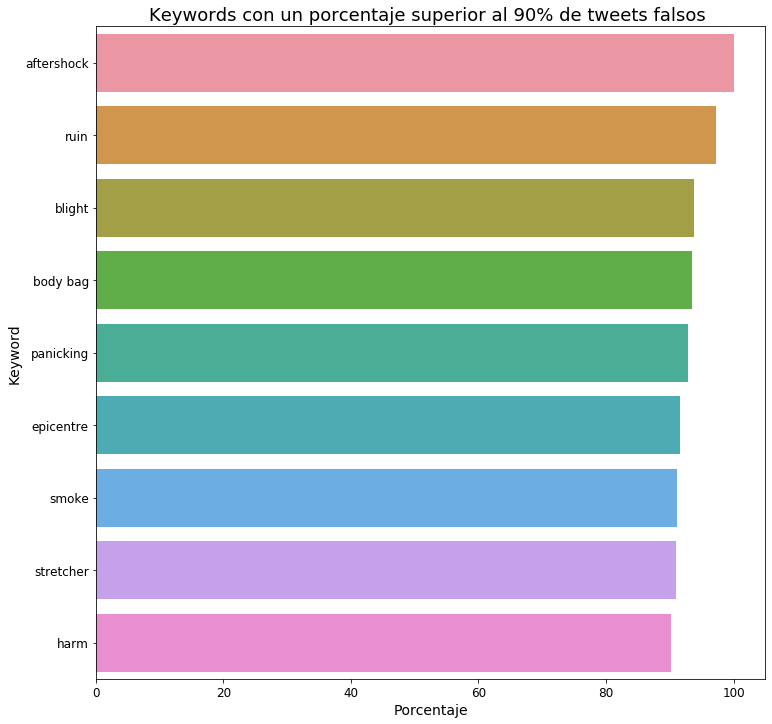

In [1484]:
not_targeted_keywords = not_targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=not_targeted_keywords['percentage_count'], y=not_targeted_keywords['keyword_grouped'],
               orient='h')

g.set_title('Keywords con un porcentaje superior al 90% de tweets falsos ', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Keyword', fontsize=14)

# Cómo varían los resultados anteriores relacionado al texto para el top 15 de desastres con más tweets?

Se agrupan algunas de las keyword y solo nos quedamos con el top15 (por cantidad de tweets)

In [1485]:
key_list_top = tweets_text_key.keyword_grouped.value_counts().nlargest(15).index
tweets_text_key['keyword_top'] = tweets_text_key.keyword_grouped.transform(lambda x: x in key_list_top)
tweets_text_key_top = tweets_text_key.loc[tweets_text_key.keyword_top].copy()
tweets_text_key_top


text keyword  target  \
6258                                    FINALLY a storm   storm       0   
6259  #gamefeed Warcraft 3-Inspired Mode Likely Hitt...   storm       0   
6262                  omfg.... I just woke up again....   storm       0   
6263  New on Ebay UK Star Wars Storm Trooper Pop! Vi...   storm       0   
6267  RT @tonyhsieh: 'The person who dances with you...   storm       0   
...                                                 ...     ...     ...   
4017  Floods cause damage and death across Asia | Al...  floods       1   
4016                              Memphis always floods  floods       1   
4015  Typhoon Soudelor approaches after 7 killed 2 m...  floods       1   
4014  69 die in Myanmar floods 250000 affected http:...  floods       1   
4011  Children in Myanmar face a 'double catastrophe...  floods       1   

     keyword_grouped  keyword_top  
6258           storm         True  
6259           storm         True  
6262           storm         True  
6263           storm         True  
6267           storm         True  
...              ...          ...  
4017        flooding         True  
4016        flooding         True  
4015        flooding         True  
4014        flooding         True  
4011        flooding         True  

[1558 rows x 5 columns]

# Existen preguntas en los tweets del top 15 por tipo de desastre? como se relacionan estas con su veracidad

In [1486]:
tweets_text_key_top['contain_question'] = tweets_text_key_top.text.transform(lambda x: "?" in x)

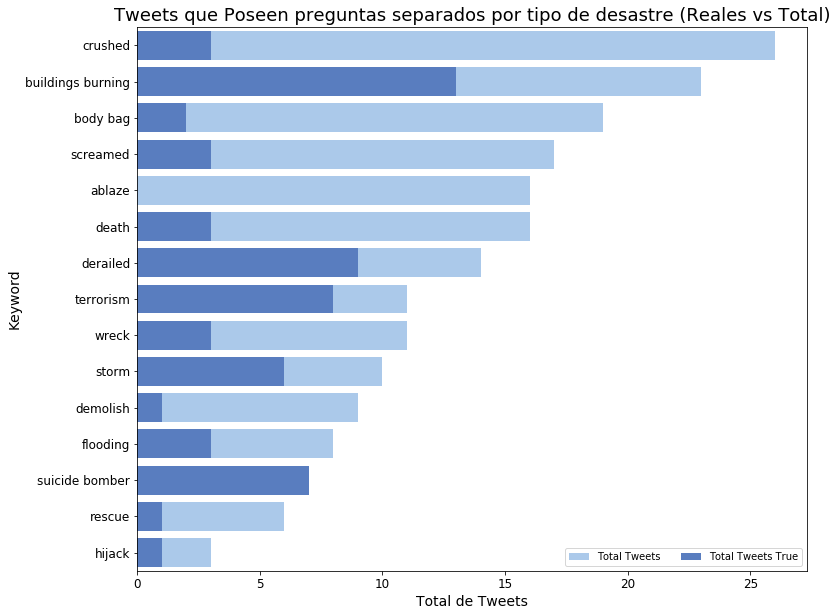

In [1487]:
rcParams['figure.figsize'] = 12,10

sns.set_color_codes("pastel")
data= tweets_text_key_top.loc[tweets_text_key_top.contain_question == True].groupby(['keyword_grouped']).agg({'text':['count'],'target':['sum']}).reset_index().sort_values(by=('text','count'),ascending=False)
sns.barplot(data = data,y='keyword_grouped',x=('text','count'), color="b",label= 'Total Tweets')

sns.set_color_codes("muted")
ax = sns.barplot(data = data,y='keyword_grouped',x=('target','sum'), color="b",label= 'Total Tweets True')
ax.set_title("Tweets que Poseen preguntas separados por tipo de desastre (Reales vs Total)",fontsize= 18)
ax.set_xlabel("Total de Tweets", fontsize= 14)
ax.set_ylabel("Keyword",fontsize= 14)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="x", labelsize=12)


# Cómo se relaciona los tweets del top 15 por tipo de desastre que poseen  enlaces con su veracidad?

In [1488]:
tweets_text_key_top['contain_link'] = tweets_text_key_top.text.transform(lambda x: "http" in x)

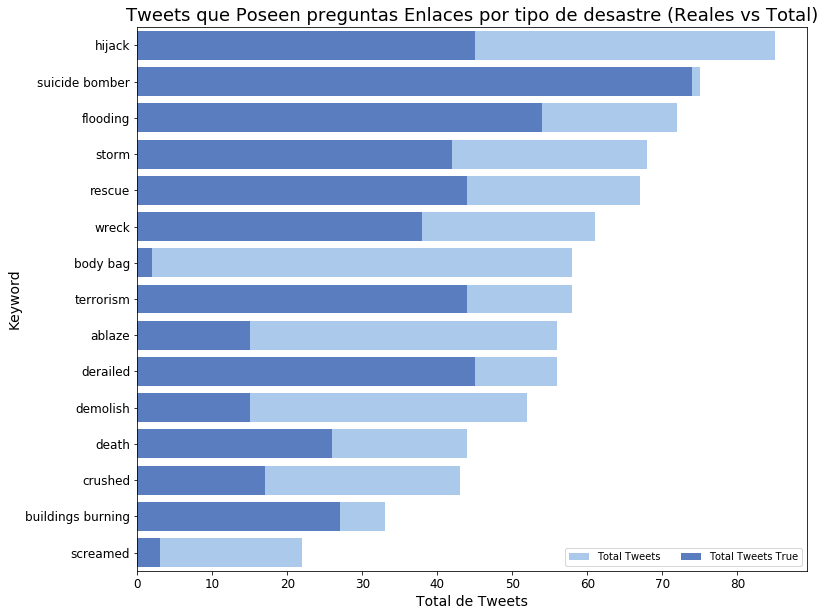

In [1489]:
sns.set_color_codes("pastel")
data= tweets_text_key_top.loc[tweets_text_key_top.contain_link == True].groupby(['keyword_grouped']).agg({'text':['count'],'target':['sum']}).reset_index().sort_values(by=('text','count'),ascending=False)
sns.barplot(data = data,y='keyword_grouped',x=('text','count'), color="b",label= 'Total Tweets')

sns.set_color_codes("muted")
ax = sns.barplot(data = data,y='keyword_grouped',x=('target','sum'), color="b",label= 'Total Tweets True')
ax.set_title("Tweets que Poseen preguntas Enlaces por tipo de desastre (Reales vs Total)",fontsize= 18)
ax.set_xlabel("Total de Tweets",fontsize= 14)
ax.set_ylabel("Keyword",fontsize= 14)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="x", labelsize=12)


# ¿Cómo es el "sentimiento" de los textos que poseen un keyword del top 5?

In [1490]:
key_list_top = tweets_text_key.keyword_grouped.value_counts().nlargest(5).index
tweets_text_key['keyword_top'] = tweets_text_key.keyword_grouped.transform(lambda x: x in key_list_top)
tweets_text_key["subjectivity_text"]=tweets_text_key.text.transform(subjectivityText)
tweets_text_key["polarity_text"]=tweets_text_key.text.transform(polarityText)
tweets_text_key['target'] = tweets_text_key['target'].transform(lambda x: 'Real' if x == 1 else 'Falso')



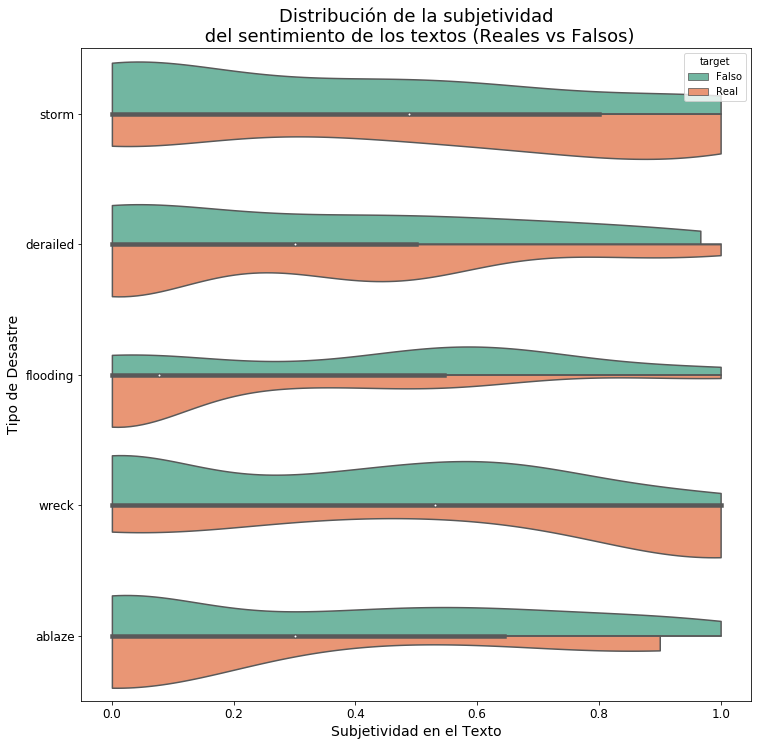

In [1491]:
rcParams['figure.figsize'] = 12,12
violin_plt=sns.violinplot(y="keyword_grouped", x="subjectivity_text", hue="target",split=True,data=tweets_text_key.loc[tweets_text_key.keyword_top],cut=0)
violin_plt.set_title("Distribución de la subjetividad\n del sentimiento de los textos (Reales vs Falsos)",fontsize=18)
violin_plt.set_xlabel("Subjetividad en el Texto",fontsize=14)
violin_plt.set_ylabel("Tipo de Desastre",fontsize=14)
violin_plt.tick_params(axis="y", labelsize=12)
violin_plt.tick_params(axis="x", labelsize=12)

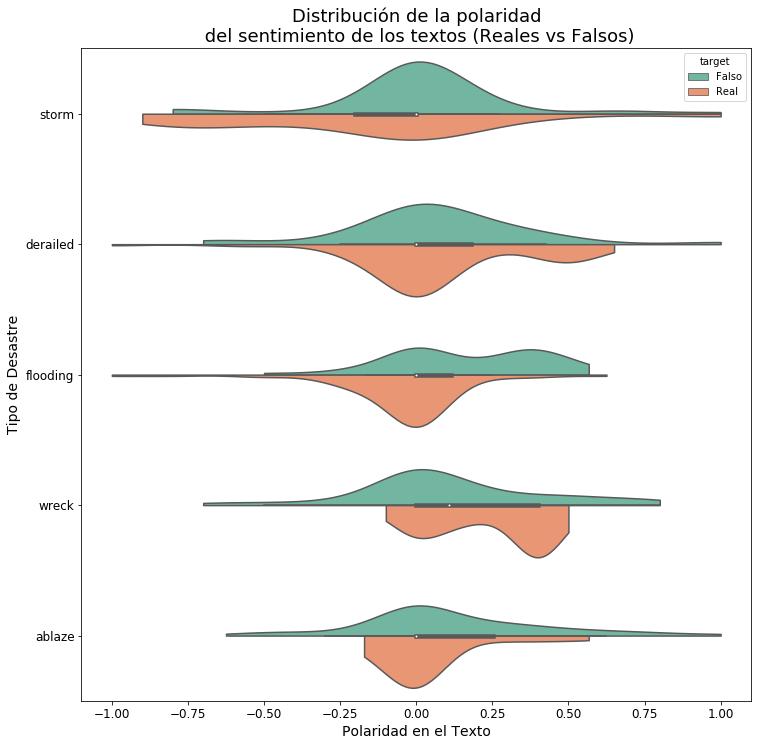

In [1492]:
violin_plt=sns.violinplot(y="keyword_grouped", x="polarity_text", hue="target",split=True,data=tweets_text_key.loc[tweets_text_key.keyword_top],cut=0)
violin_plt.set_title("Distribución de la polaridad\n del sentimiento de los textos (Reales vs Falsos)",fontsize=18)
violin_plt.set_xlabel("Polaridad en el Texto",fontsize=14)
violin_plt.set_ylabel("Tipo de Desastre",fontsize=14)
violin_plt.tick_params(axis="y", labelsize=12)
violin_plt.tick_params(axis="x", labelsize=12)


# ¿Cuáles son los paises con mas tweets?

In [1493]:
#La transformación de las localidades es muy costosa (3 horas), por lo que se ha generado un .csv con esta columna
#agregada, la misma fue generada a través de la librería geopy.geocoders, el cual para una localidad dada devuelve un 
# objeto de tipo Location el cual posee una dirección, latitud y longitud. Esta herramienta permite agrupar por 
#localidades iguales pero escritas de forma distinta (ejemplo: NYC con new york city)

#tomar en cuenta que una parte de los registros no están ya que o no posee localidad o geocoders no pudo hallar su Location

tweets_location = pd.read_csv('./data/tweets_with_clean_location.csv', encoding='utf-8').sort_values(by=['target'])
tweets_location.loc[:,'keyword'] = tweets_location.loc[:,'keyword'].str.replace("%20", " ")
tweets_location.dropna(subset=['location'],inplace=True)
tweets_location.sample(10)


Unnamed: 0     id     keyword             location  \
4112        4112   5843   hailstorm             far away   
2791        2791   4017    disaster              Nigeria   
7246        7246  10376     weapons      ( ?å¡ ?? ?å¡),    
2667        2667   3829    detonate  In My Lab Creating    
4183        4183   5942      hazard      London, England   
3326        3326   4765   evacuated          Chicago, IL   
2968        2968   4264    drowning     New Jersey/ D.R.   
7539        7539  10779    wreckage          Maharashtra   
1026        1026   1488   body bags         Charlotte NC   
2744        2744   3947  devastated          ACCRA GHANA   

                                                   text  target  \
4112  Calgary news weather and traffic for August 5 ...       0   
2791  CW500: Dealing with disaster - http://t.co/jq9...       1   
7246  I liked a @YouTube video from @dannyonpc http:...       0   
2667  Apollo Brown - Detonate (feat. M.O.P.) by Mell...       0   
4183  Seeing Hazard without the beard like... http:/...       0   
3326  Green line service on south side disrupted aft...       1   
2968  @_jeesss_ @Ethereal_7 Hello 911 yeah we have s...       1   
7539  Wreckage 'Conclusively Confirmed' as From MH37...       1   
1026  The Body Bags has a show on 08/07/2015 at 07:3...       0   
2744  Obama Declares Disaster for Typhoon-Devastated...       1   

                             address_latitude_longitude         city  \
4112  ("La Far-Away, La Moulière, Caille, Grasse, Al...  La Far-Away   
2791                  ('Nigeria', 9.6000359, 7.9999721)          NaN   
7246  ('A&A, Karolew, Pabianice, powiat pabianicki, ...          A&A   
2667                                 (None, None, None)          NaN   
4183  ('London, Greater London, England, SW1A 2DX, U...       London   
3326  ('Chicago, Cook County, Illinois, United State...      Chicago   
2968  ('R, Presidental Court Apartments, Clements Br...            R   
7539      ('Maharashtra, India', 19.531932, 76.0554568)  Maharashtra   
1026  ('Charlotte, Mecklenburg County, North Carolin...    Charlotte   
2744  ('Accra, Accra Metropolitan, Greater Accra Reg...        Accra   

                        country   latitude  longitude  
4112                     France  43.750315   6.764810  
2791                        NaN   9.600036   7.999972  
7246                     Polska  51.658362  19.358974  
2667                        NaN        NaN        NaN  
4183             United Kingdom  51.507322  -0.127647  
3326   United States of America  41.875562 -87.624421  
2968   United States of America  39.855942 -75.061870  
7539                      India  19.531932  76.055457  
1026   United States of America  35.227087 -80.843127  
2744                      Ghana   5.560014  -0.205744

Text(0, 0.5, 'Pais')

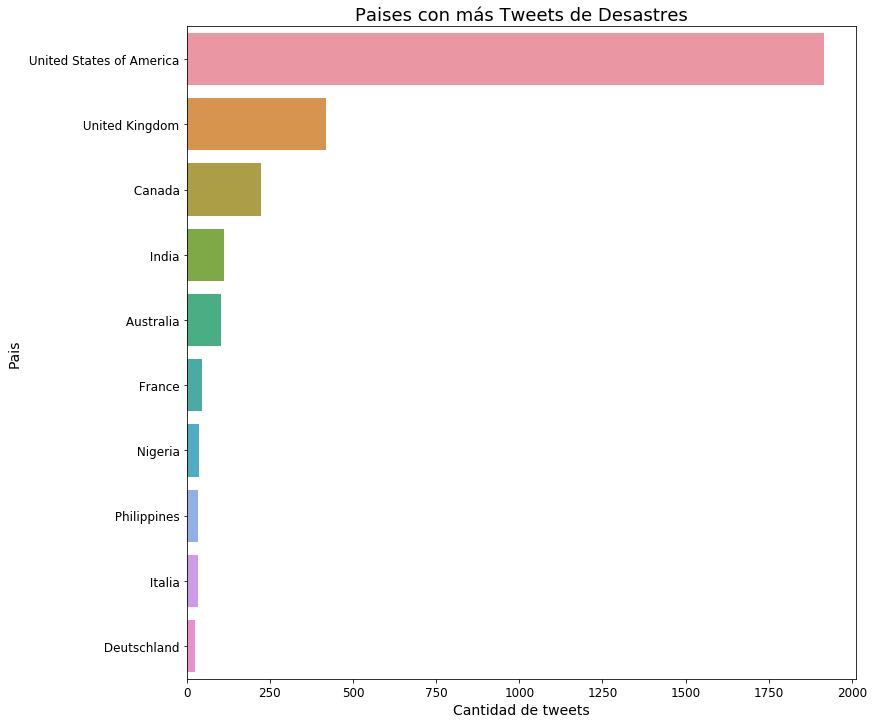

In [1494]:
g=sns.barplot(x="country", y="index", data=tweets_location.country.value_counts().nlargest(10).to_frame().reset_index())
g.tick_params(axis="y", labelsize=12)
g.tick_params(axis="x", labelsize=12)
g.set_title('Paises con más Tweets de Desastres', fontsize=18)
g.set_xlabel('Cantidad de tweets', fontsize=14)
g.set_ylabel('Pais', fontsize=14)


In [1495]:
fig = go.Figure()

# Recorremos los datos del archivo csv y extraemos sus coordenadas,
# etiquetas a mostrar y especificamos características del marcador
for i in tweets_location:
    fig.add_trace(go.Scattergeo(
            lon = tweets_location['longitude'],
            lat = tweets_location['latitude'],
            marker = dict(
                size = 1,
                color = 'red',
                line_color='white',
                line_width=0.5,
                sizemode = 'area'
        )))
 
# Establecemos las características del mapa base, el título y opciones
# de leyenda, así como la propia proyección del mapa.
fig.update_layout(
    title_text = 'Distribución de los Tweets en el Mundo',
    showlegend = False,
    geo = dict(
        scope='world',
        resolution=110,
        projection_type='mollweide',
        showcoastlines=True,
        showocean=True,
        oceancolor='#132630',
        lakecolor='#132630',
        coastlinecolor='#224354',
        landcolor='#224354',
    )
)
 
# Mostramos la figura creada con las características dadas
fig.show()

# Top 5 países con más de 20 tweets y la cantidad de tweets reales relativo de desastre

In [1496]:
count_by_country = tweets_location.groupby(['country']).size().to_frame()
count_by_country.reset_index(inplace=True)
count_by_country.columns = ['country', 'ctry_count']
targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 1].groupby(['country']).size().to_frame()
targeted_tweets_location.reset_index(inplace=True)
targeted_tweets_location.columns = ['country', 'targeted_ctry_count']
count_by_country = count_by_country.merge(targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_targeted_ctry_count'] = (count_by_country.loc[:,'targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count'] ) * 100
top_5_ctry_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_targeted_ctry_count'])



Text(0, 0.5, 'Pais')

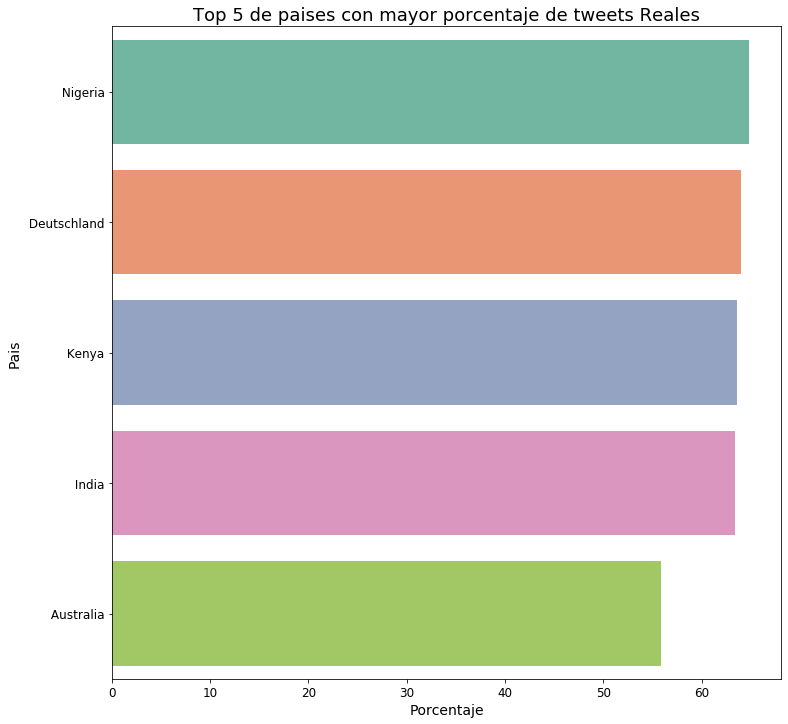

In [1497]:
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=top_5_ctry_targeted['relative_targeted_ctry_count'], y=top_5_ctry_targeted['country'],
               orient='h')

g.set_title('Top 5 de paises con mayor porcentaje de tweets Reales', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Pais', fontsize=14)

# Top 5 países con más de 20 tweets y la cantidad de tweets falsos relativo de desastre

In [1498]:
not_targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 0].groupby(['country']).size().to_frame()
not_targeted_tweets_location.reset_index(inplace=True)
not_targeted_tweets_location.columns = ['country','not_targeted_ctry_count']
count_by_country = count_by_country.merge(not_targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_not_targeted_ctry_count'] = (count_by_country.loc[:,'not_targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count']*100)

top_5_ctry_not_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_not_targeted_ctry_count'])


Text(0, 0.5, 'Pais')

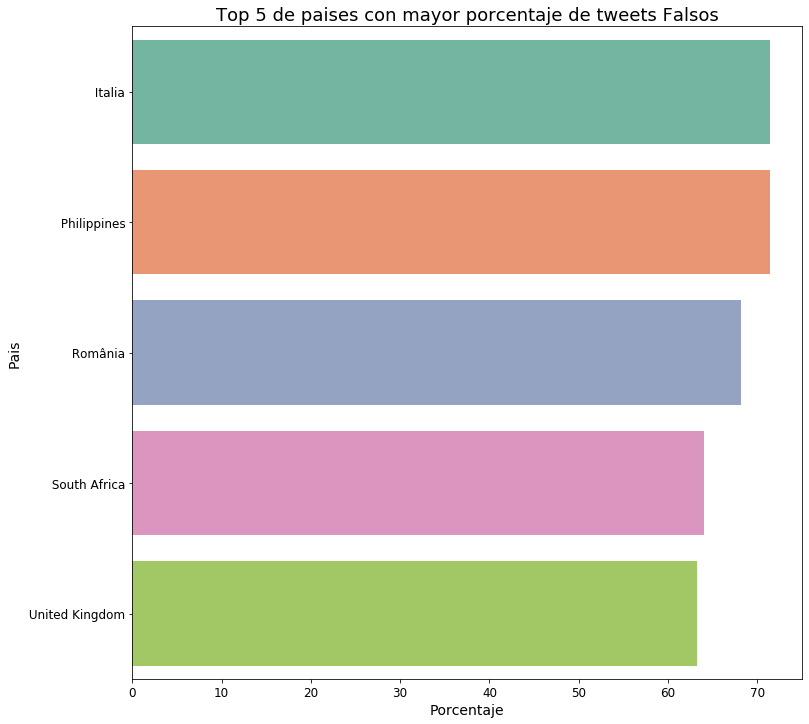

In [1499]:
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=top_5_ctry_not_targeted['relative_not_targeted_ctry_count'], y=top_5_ctry_not_targeted['country'],
               orient='h')

g.set_title('Top 5 de paises con mayor porcentaje de tweets Falsos', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Pais', fontsize=14)